# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
train = pd.read_csv('titanic_train.csv')

In [110]:
test = pd.read_csv('titanic_test.csv')

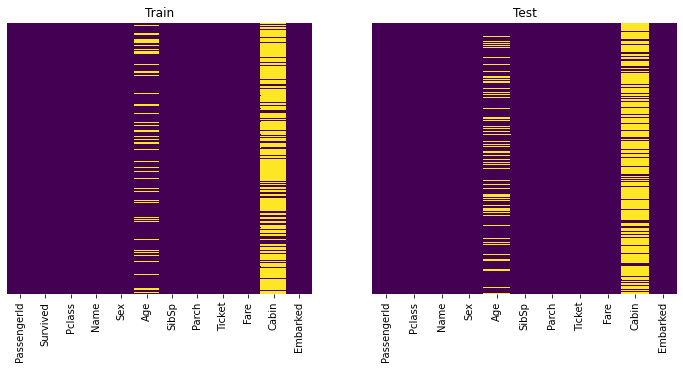

In [9]:
fig,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
sns.heatmap(train.isnull(), ax=ax1, yticklabels=False, cbar = False,cmap = 'viridis')
ax1.set_title('Train')
sns.heatmap(test.isnull(), ax=ax2, yticklabels=False, cbar = False,cmap = 'viridis')
ax2.set_title('Test')
plt.show()

In [12]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Fare')

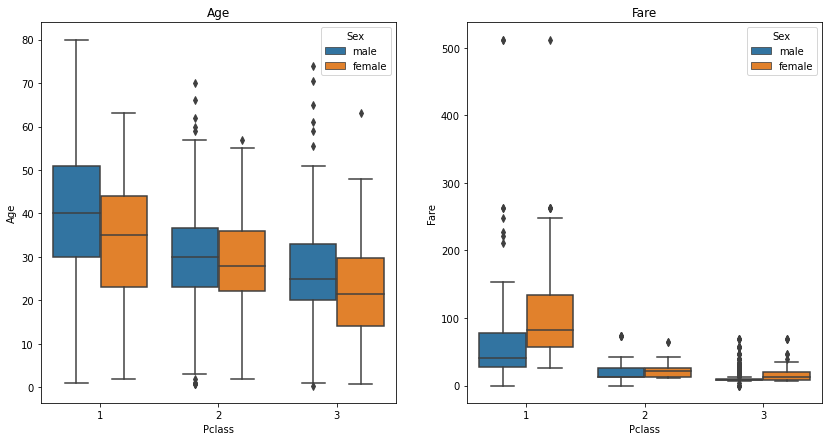

In [129]:
#fig, ax = plt.subplots(3, 2, sharey=False, figsize=(14,14))
#train[train['Sex']=='female']['Age']
#sns.scatterplot(x=train[train['Sex']=='male']['Age'],y=train[train['Sex']=='female']['Fare'],data=train, ax=ax[0][0])
#sns.scatterplot(x=train[train['Sex']=='female']['Age'],y=train[train['Sex']=='female']['Fare'],data=train, ax=ax[0][0])

train.groupby(['Sex','Pclass']).mean()['Age']
fig,(ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(14,7))
sns.boxplot(x='Pclass', y='Age', data=train, hue='Sex', ax=ax1)
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Sex', ax=ax2)
ax1.set_title('Age')
ax2.set_title('Fare')

In [131]:
train.groupby(['Sex','Pclass']).mean()['Age']

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [132]:
test.groupby(['Sex','Pclass']).mean()['Age']

Sex     Pclass
female  1         41.333333
        2         24.376552
        3         23.073400
male    1         40.520000
        2         30.940678
        3         24.525104
Name: Age, dtype: float64

In [133]:
def impute_age_adv_train(cols): # This function will be used in an DataFrame.apply() method. Hence, the cols variable will be 
    # a list of series. This is why cols[0] and cols[1] can be indexed in this way
    Age = cols[0]# this is a series
    Sex = cols[1]
    Pclass = cols[2]
    if pd.isnull(Age):

        if Sex == 'female':
            if Pclass == 1:
                return 34

            elif Pclass == 2:
                return 28

            else:
                return 21
        else:
            if Pclass == 1:
                return 41

            elif Pclass == 2:
                return 30

            else:
                return 26

    else:
        return Age
    
def impute_age_adv_test(cols): # This function will be used in an DataFrame.apply() method. Hence, the cols variable will be 
    # a list of series. This is why cols[0] and cols[1] can be indexed in this way
    Age = cols[0]# this is a series
    Sex = cols[1]
    Pclass = cols[2]
    if pd.isnull(Age):

        if Sex == 'female':
            if Pclass == 1:
                return 41

            elif Pclass == 2:
                return 24

            else:
                return 23
        else:
            if Pclass == 1:
                return 40

            elif Pclass == 2:
                return 30

            else:
                return 24

    else:
        return Age

In [120]:
def impute_age(df): # This function will be used in an DataFrame.apply() method. Hence, the cols variable will be 
    # a list of series. This is why cols[0] and cols[1] can be indexed in this way
    #Age = cols[0]# this is a series
    #Sex = cols[1]
    #Pclass = cols[2]
    if pd.isnull(df.loc['Age']):

        if dfdf.loc['Sex'] == 'female':
            if dfdf.loc['Pclass'] == 1:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('female',1)])

            elif dfdf.loc['Pclass'] == 2:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('female',2)])

            else:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('female',3)])
        else:
            if df['Pclass'] == 1:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('male',1)])

            elif df['Pclass'] == 2:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('male',2)])

            else:
                return int(df.groupby(['Sex','Pclass']).mean()['Age'].loc[('male',3)])

    else:
        return df['Age']

In [128]:
def test_impute(df):
    print(df.size)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [135]:
train['Age'] = train[['Age', 'Sex', 'Pclass']].apply(impute_age_adv_train,axis=1)
test['Age'] = test[['Age', 'Sex', 'Pclass']].apply(impute_age_adv_test,axis=1)

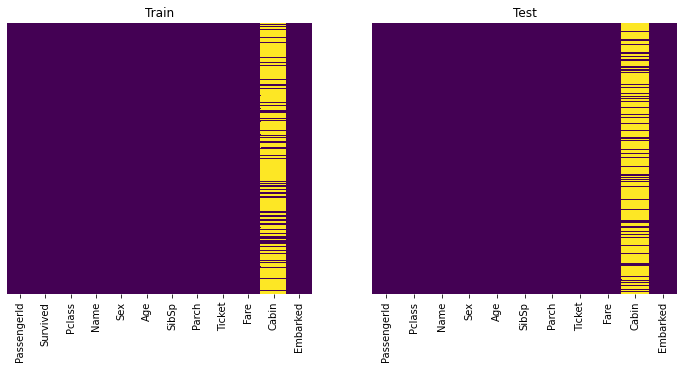

In [136]:
fig,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
sns.heatmap(train.isnull(), ax=ax1, yticklabels=False, cbar = False,cmap = 'viridis')
ax1.set_title('Train')
sns.heatmap(test.isnull(), ax=ax2, yticklabels=False, cbar = False,cmap = 'viridis')
ax2.set_title('Test')
plt.show()

In [137]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train,sex,embark], axis=1)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,1,1,38.0,1,0,71.2833,C85,0,0,0
2,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,C123,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [138]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test,sex,embark], axis=1)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,34.5,0,0,7.8292,NaN,1,1,0
1,3,47.0,1,0,7.0000,NaN,0,0,1
2,2,62.0,0,0,9.6875,NaN,1,1,0
3,3,27.0,0,0,8.6625,NaN,1,0,1
4,3,22.0,1,1,12.2875,NaN,0,0,1
